In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("../data/seattle-weather.csv")
df.head()


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [4]:
df.isnull().sum()


date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [5]:
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year


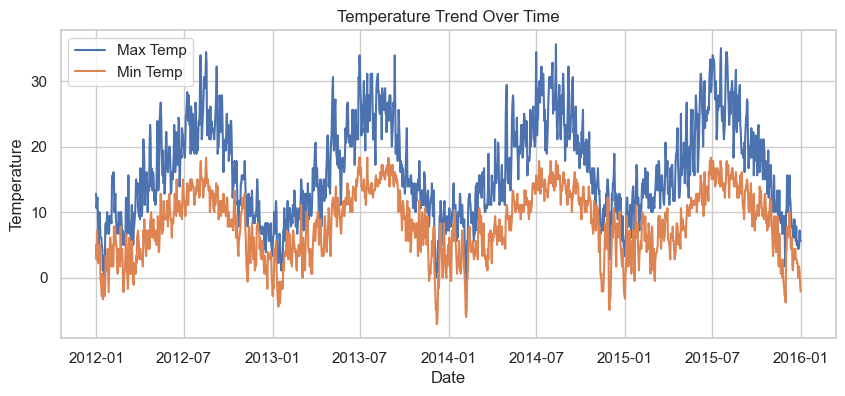

In [6]:
plt.figure(figsize=(10,4))
plt.plot(df["date"], df["temp_max"], label="Max Temp")
plt.plot(df["date"], df["temp_min"], label="Min Temp")
plt.title("Temperature Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()


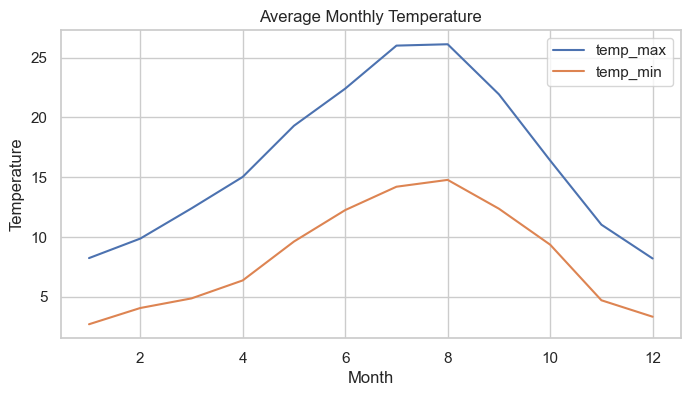

In [7]:
monthly_temp = df.groupby("month")[["temp_max", "temp_min"]].mean()

monthly_temp.plot(kind="line", figsize=(8,4))
plt.title("Average Monthly Temperature")
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.show()


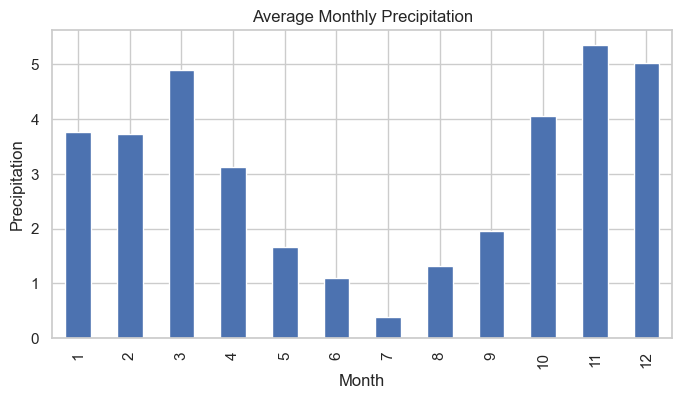

In [8]:
monthly_rain = df.groupby("month")["precipitation"].mean()

monthly_rain.plot(kind="bar", figsize=(8,4))
plt.title("Average Monthly Precipitation")
plt.xlabel("Month")
plt.ylabel("Precipitation")
plt.show()


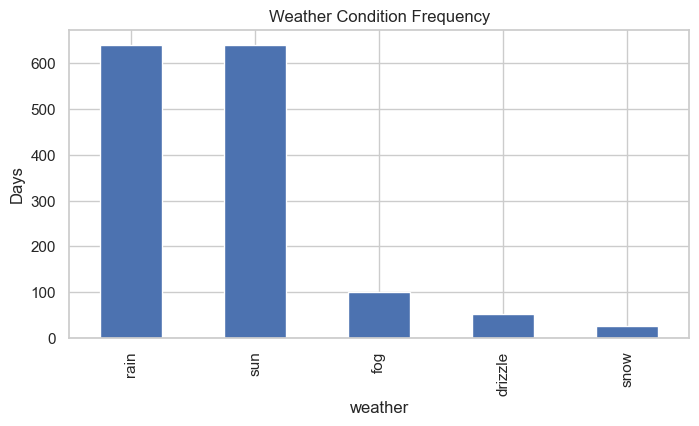

In [9]:
df["weather"].value_counts().plot(
    kind="bar",
    figsize=(8,4),
    title="Weather Condition Frequency"
)
plt.ylabel("Days")
plt.show()


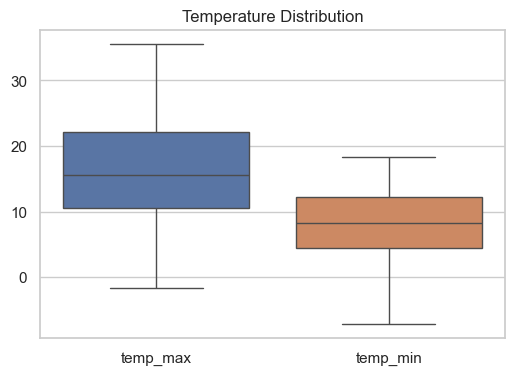

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df[["temp_max", "temp_min"]])
plt.title("Temperature Distribution")
plt.show()
